## 🔍 Feature Exploration

In this section, we:
- Identify categorical and numerical variables
- Explore frequency distributions of key categorical features
- Visualize distributions of continuous variables to understand skewness and spread

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Load the dataset again
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Remove rows with missing values
df = df.dropna(subset=['TotalCharges'])


cat_features = df.select_dtypes(include="object").columns.tolist()
cat_features = [col for col in cat_features if col != "Churn"]

num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical features: ")
print(cat_features)

print("Numerical features: ")
print(num_features)


Categorical features: 
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical features: 
['SeniorCitizen', 'tenure', 'MonthlyCharges']

 Value counts for 'customerID':
customerID
7590-VHVEG    0.000142
5575-GNVDE    0.000142
3668-QPYBK    0.000142
7795-CFOCW    0.000142
9237-HQITU    0.000142
Name: proportion, dtype: float64

 Value counts for 'gender':
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

 Value counts for 'Partner':
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

 Value counts for 'Dependents':
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

 Value counts for 'PhoneService':
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

 Value counts f

Numerical columns for KDE: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


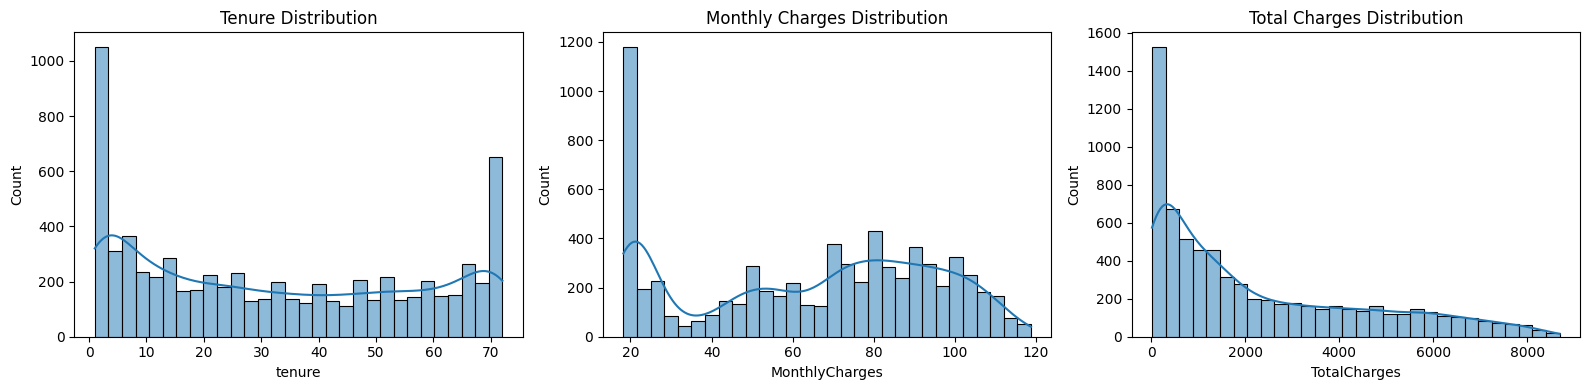

In [10]:
#Plot distribution of key numerical variables
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

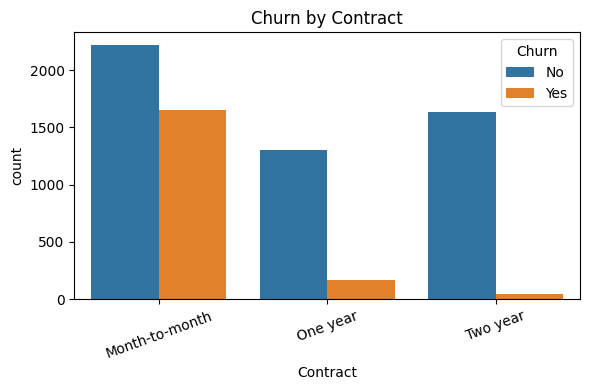

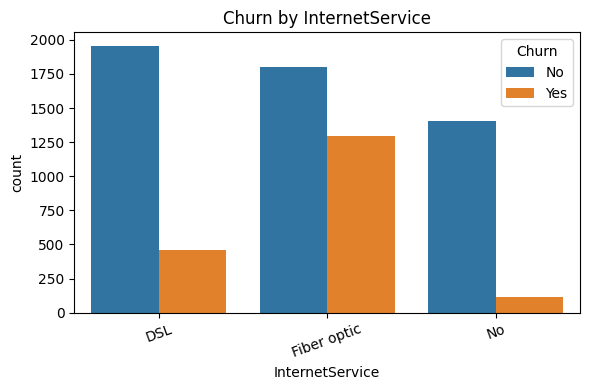

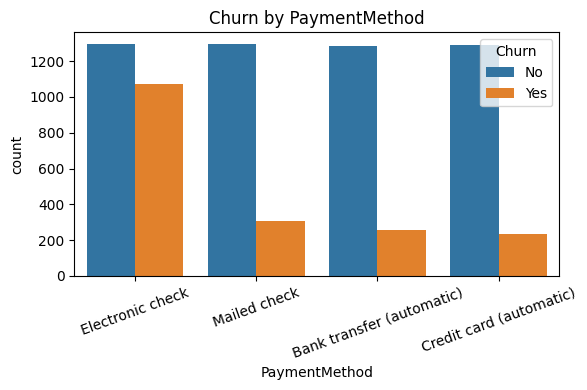

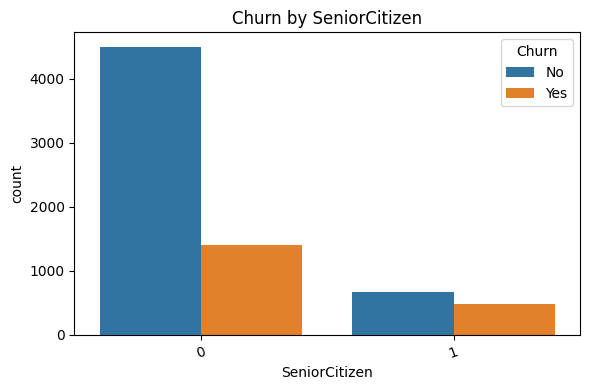

In [11]:
#Bivariate analysis: Churn distribution across key categorical features
cat_cols_to_plot = ['Contract','InternetService','PaymentMethod','SeniorCitizen']

for col in cat_cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

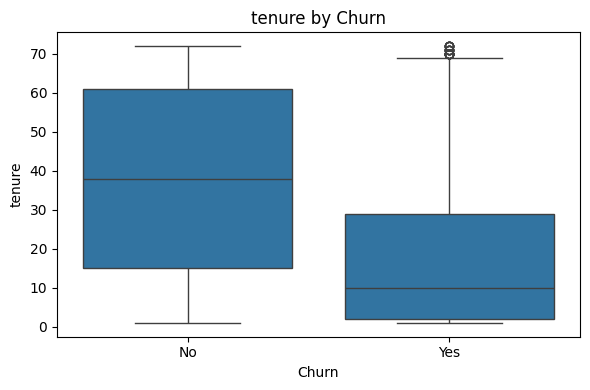

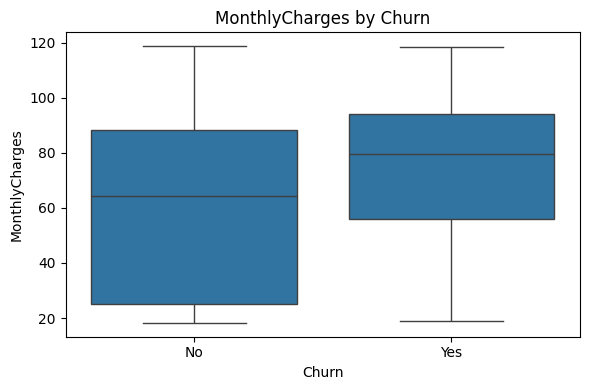

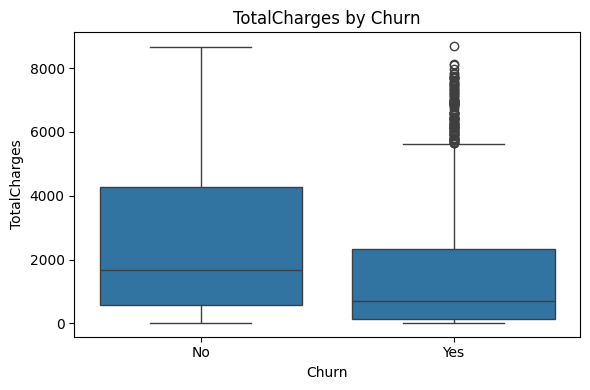

In [12]:
#Numerical features by Churn group
num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.tight_layout()
    plt.show()

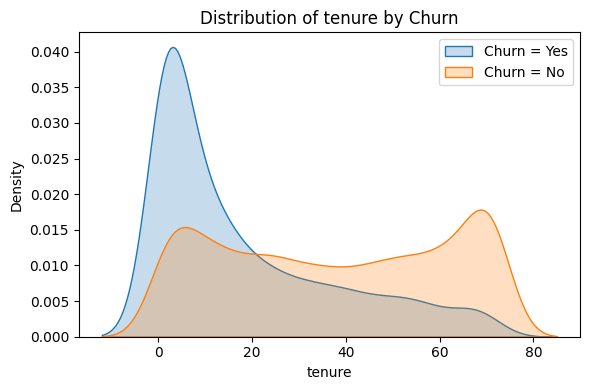

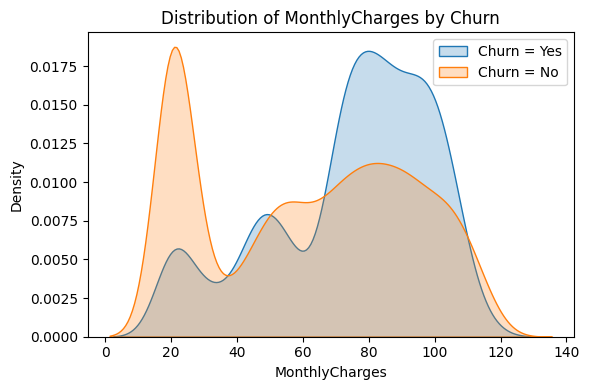

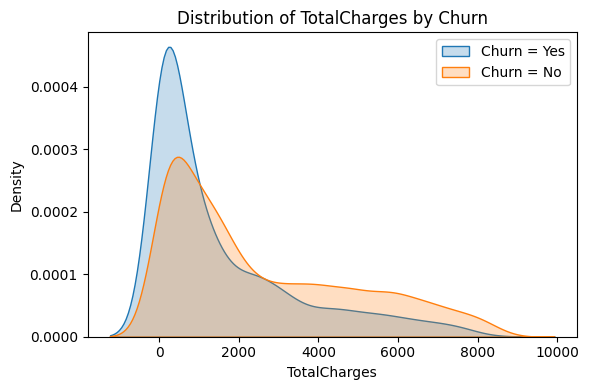

In [13]:
#More Detailed
#KDE plots for Churned VS Not Churned
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['Churn'] == 'Yes'][col], label='Churn = Yes', fill=True)
    sns.kdeplot(df[df['Churn'] == 'No'][col], label='Churn = No', fill=True)
    plt.title(f'Distribution of {col} by Churn')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 🧠 Feature Insights Summary

- Customers with **longer tenure** are significantly less likely to churn.
- **Month-to-month contracts** and **Electronic check** payments have noticeably higher churn rates.
- `SeniorCitizen` seems to have only a slight influence.
- `MonthlyCharges` and `TotalCharges` are slightly higher for churned customers, but there's overlap.

These insights suggest which features may be most predictive and which ones might need transformation or encoding before modeling.
